>>> Params:  {'sample': 0.006, 'train_size': 0.7, 'test_size': 0.7, 'gru_units': 32, 'emb_output_dim': 16, 'return_sequences': False, 'epochs': 3}
SAMPLE_SIZE:  7836


/Users/kkepins-macwro_1/Library/Mobile Documents/com~apple~CloudDocs/_GIT/data-science-upskills/deep-learning/quora_insincere/RNNModelManager.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.sequences = np.array(tokenizer.texts_to_sequences(self.sentences))
2023-02-16 15:14:39.927907: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-16 15:14:39.928394: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>

--- preprocessing done in 1.7938456535339355 s ---
Metal device set to: Apple M1
Epoch 1/3


2023-02-16 15:14:40.480388: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-16 15:14:41.574577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-16 15:14:41.743367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-16 15:14:48.348435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


343/343 [==============================] - 115s 286ms/step - loss: 0.6927 - accuracy: 0.5117
Epoch 2/3
343/343 [==============================] - 88s 257ms/step - loss: 0.6904 - accuracy: 0.5280
Epoch 3/3
343/343 [==============================] - 88s 257ms/step - loss: 0.6878 - accuracy: 0.5407
--- model training done in 291.42531275749207 s ---


2023-02-16 15:19:32.095224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-16 15:19:32.153141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 25s 178ms/step - loss: 0.6836 - accuracy: 0.5538
--- evaluation done in 25.06779408454895 seconds ---


2023-02-16 15:19:57.105068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-16 15:19:57.149364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 17s 247ms/step
Validation Loss: 0.6836
Validation Accuracy: 0.5538
Test AUC:  0.5504401692183722


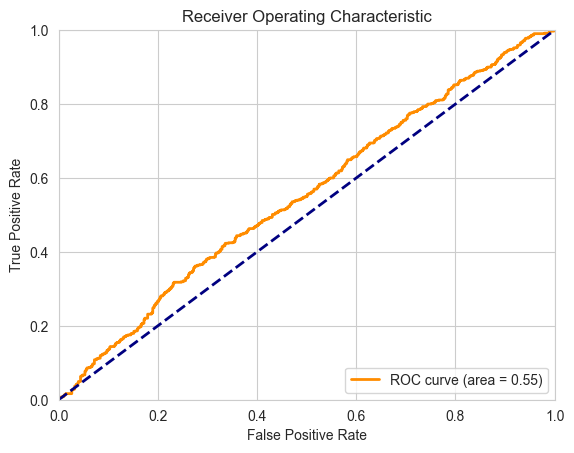

--- prediction done in 17.414441108703613 seconds ---
>>> Params:  {'sample': 0.003, 'train_size': 0.7, 'test_size': 0.7, 'gru_units': 32, 'emb_output_dim': 16, 'return_sequences': False, 'epochs': 3}
SAMPLE_SIZE:  3918


/Users/kkepins-macwro_1/Library/Mobile Documents/com~apple~CloudDocs/_GIT/data-science-upskills/deep-learning/quora_insincere/RNNModelManager.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.sequences = np.array(tokenizer.texts_to_sequences(self.sentences))


--- preprocessing done in 0.8005430698394775 s ---
Epoch 1/3


2023-02-16 15:20:17.007551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-16 15:20:17.158208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-16 15:20:17.988954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 58/172 [=========>....................] - ETA: 9s - loss: 0.6936 - accuracy: 0.4935

KeyboardInterrupt: 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from RNNModelManager import RNNModelManager

np.random.seed(42)
tf.random.set_seed(42)

def stratify(df0, df1, SAMPLE_SIZE):
    n_samples = min(len(df0), len(df1))
    SAMPLE_SIZE = min(n_samples, SAMPLE_SIZE)
    print('SAMPLE_SIZE: ', SAMPLE_SIZE)
    sample0 = df0.sample(n=SAMPLE_SIZE, random_state=42, replace=False).drop_duplicates()
    sample1 = df1.sample(n=SAMPLE_SIZE, random_state=42, replace=False).drop_duplicates()
    sample_df = pd.concat([sample0, sample1])
    # counts = sample_df.target.value_counts(normalize=True)
    # counts.plot(kind='bar')
    # plt.xticks(rotation=0)
    # plt.title('Wykres rozkładu wartości dla kolumny "target"')
    # for i, v in enumerate(counts):
    #     plt.text(i, v, str(v), ha='center', va='bottom')
    # plt.show()

    return sample_df


tf.random.set_seed(42)
raw_df = pd.read_csv('./input/train.csv')

params = [
    # Test AUC:  0.6371
    # {   'sample': 0.003
    #     , 'sample_replace': True
    #     , 'split': 0.3
    #     , 'gru_units': 32
    #     , 'return_sequences': False
    #     , 'epochs': 3},

    {   'sample': 0.006
        , 'train_size': 0.7
        , 'test_size': 0.7
        , 'gru_units': 32
        , 'emb_output_dim': 16
        , 'return_sequences': False
        , 'epochs': 3},
    {   'sample': 0.003
        , 'train_size': 0.7
        , 'test_size': 0.7
        , 'gru_units': 32
        , 'emb_output_dim': 16
        , 'return_sequences': False
        , 'epochs': 3},
]

for p in params:
    print('>>> Params: ', p)
    SAMPLE_SIZE = int(len(raw_df) * p['sample'])
    raw_sicnere = raw_df[raw_df['target'] == 0]
    raw_insicnere = raw_df[raw_df['target'] == 1]
    sample_df = stratify(raw_sicnere, raw_insicnere, SAMPLE_SIZE)

    sentences = sample_df.question_text
    labels = np.array(sample_df.target)
    rnn = RNNModelManager(sentences, labels)
    rnn.preprocess_split(p['train_size'], p['test_size'])
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=rnn.vocab_size, output_dim=p['emb_output_dim']),
        tf.keras.layers.GRU(units=p['gru_units'], return_sequences=p['return_sequences']),
        tf.keras.layers.Dense(units=1, activation='sigmoid')])
    rnn.compile_fit_model(model, epochs=p['epochs'])
    rnn.evaluate()
    rnn.predict_report()

    model.reset_states()
    del model, rnn



In [2]:
rnn.vocab_size

114

>>> Params:  {'sample': 0.005, 'train_size': 0.7, 'test_size': 0.7, 'units': 32, 'emb_output_dim': 16, 'return_sequences': False, 'epochs': 3}
SAMPLE_SIZE:  6530


[nltk_data] Downloading package punkt to /Users/kkepins-
[nltk_data]     macwro_1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/kkepins-
[nltk_data]     macwro_1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/kkepins-macwro_1/Library/Mobile Documents/com~apple~CloudDocs/_GIT/data-science-upskills/deep-learning/quora_insincere/RNNModelManager.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.sequences = np.array(tokenizer.texts_to_sequences(self.sentences))


--- preprocessing done in 2.260830879211426 s ---
Epoch 1/3


2023-02-15 16:09:37.088620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-15 16:09:37.249375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-15 16:09:39.822356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - 88s 268ms/step - loss: 0.6665 - accuracy: 0.5837
Epoch 2/3
286/286 [==============================] - 66s 229ms/step - loss: 0.6259 - accuracy: 0.6548
Epoch 3/3
286/286 [==============================] - 73s 254ms/step - loss: 0.6147 - accuracy: 0.6695
--- model training done in 226.56084394454956 s ---


2023-02-15 16:13:23.086213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-15 16:13:23.182016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 20s 202ms/step - loss: 0.6085 - accuracy: 0.6770
--- evaluation done in 19.90683102607727 seconds ---


2023-02-15 16:13:43.037249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-15 16:13:43.095054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 11s 221ms/step
Validation Loss: 0.6085
Validation Accuracy: 0.6770
Test AUC:  0.7223545571513024


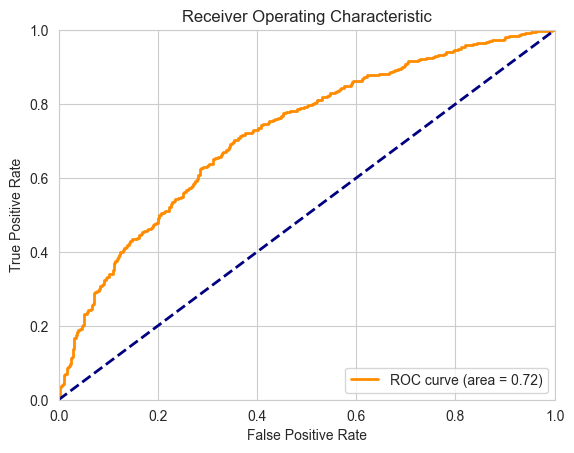

--- prediction done in 10.801400899887085 seconds ---
>>> Params:  {'sample': 0.004, 'train_size': 0.7, 'test_size': 0.7, 'units': 32, 'emb_output_dim': 16, 'return_sequences': False, 'epochs': 3}
SAMPLE_SIZE:  5224


[nltk_data] Downloading package punkt to /Users/kkepins-
[nltk_data]     macwro_1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/kkepins-
[nltk_data]     macwro_1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/kkepins-macwro_1/Library/Mobile Documents/com~apple~CloudDocs/_GIT/data-science-upskills/deep-learning/quora_insincere/RNNModelManager.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.sequences = np.array(tokenizer.texts_to_sequences(self.sentences))


--- preprocessing done in 1.1220498085021973 s ---
Epoch 1/3


2023-02-15 16:13:56.956014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-15 16:13:57.325917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-15 16:13:58.374810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


229/229 [==============================] - 26s 96ms/step - loss: 0.6760 - accuracy: 0.5578
Epoch 2/3
229/229 [==============================] - 22s 94ms/step - loss: 0.6307 - accuracy: 0.6450
Epoch 3/3
229/229 [==============================] - 18s 81ms/step - loss: 0.6230 - accuracy: 0.6560
--- model training done in 65.9457380771637 s ---


2023-02-15 16:15:02.274065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-15 16:15:02.490216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - 5s 48ms/step - loss: 0.6274 - accuracy: 0.6597
--- evaluation done in 4.65047287940979 seconds ---


2023-02-15 16:15:06.799553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-15 16:15:06.849539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 58ms/step
Validation Loss: 0.6274
Validation Accuracy: 0.6597
Test AUC:  0.750733584761454


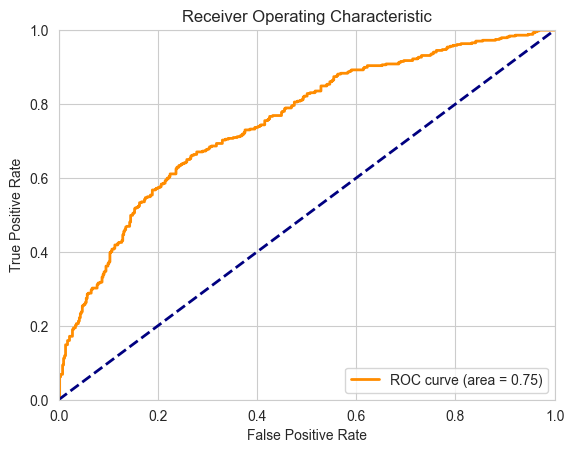

--- prediction done in 2.4572970867156982 seconds ---


In [8]:


params = [
    # Test AUC:  0.74
    {   'sample': 0.005
        , 'train_size': 0.7
        , 'test_size': 0.7
        , 'units': 32
        # , 'gru_activation': None
        , 'emb_output_dim': 16
        , 'return_sequences': False
        , 'epochs': 3},
    # Test AUC:  0.74
    {   'sample': 0.004
        , 'train_size': 0.7
        , 'test_size': 0.7
        , 'units': 32
        # , 'gru_activation': 'tanh'
        , 'emb_output_dim': 16
        , 'return_sequences': False
        , 'epochs': 3},
]

for p in params:
    print('>>> Params: ', p)
    SAMPLE_SIZE = int(len(raw_df) * p['sample'])
    raw_sicnere = raw_df[raw_df['target'] == 0]
    raw_insicnere = raw_df[raw_df['target'] == 1]
    sample_df = stratify(raw_sicnere, raw_insicnere, SAMPLE_SIZE)

    sentences = sample_df.question_text
    labels = np.array(sample_df.target)
    rnn = RNNModelManager(sentences, labels)
    rnn.preprocess_split(p['train_size'], p['test_size'])

    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=rnn.vocab_size, output_dim=p['emb_output_dim']),
        tf.keras.layers.LSTM(units=p['units']),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    rnn.compile_fit_model(model, epochs=p['epochs'])
    rnn.evaluate()
    rnn.predict_report()

    model.reset_states()
    del model, rnn


In [1]:
import os, warnings, logging
import numpy as np
import pandas as pd
from RNNModelManager import RNNModelManager

warnings.filterwarnings("ignore", message="Creating an ndarray from ragged nested sequences")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 3 - errors only
logging.getLogger('tensorflow').setLevel(logging.ERROR)

import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

def stratify(df0, df1, SAMPLE_SIZE):
    n_samples = min(len(df0), len(df1))
    SAMPLE_SIZE = min(n_samples, SAMPLE_SIZE)
    print('SAMPLE_SIZE: ', SAMPLE_SIZE)
    sample0 = df0.sample(n=SAMPLE_SIZE, random_state=42, replace=False).drop_duplicates()
    sample1 = df1.sample(n=SAMPLE_SIZE, random_state=42, replace=False).drop_duplicates()
    sample_df = pd.concat([sample0, sample1])
    return sample_df

>>> Params:  {'sample': 0.004, 'train_size': 0.7, 'test_size': 0.7, 'lstm_units': 32, 'lstm_activation': 'tanh', 'lstm_recurrent_activation': 'sigmoid', 'lstm_kernel_regularizer': <keras.regularizers.L2 object at 0x159247d90>, 'lstm_bias_regularizer': <keras.regularizers.L2 object at 0x159246b60>, 'lstm_dropout': 0.0, 'lstm_kernel_constraint': None, 'dense_units': 16, 'dense_activation': 'tanh', 'emb_output_dim': 16, 'epochs': 3}
SAMPLE_SIZE:  5224
--- preprocessing done in 1.093578815460205 s ---
Metal device set to: Apple M1
Epoch 1/3
229/229 [==============================] - 36s 130ms/step - loss: 0.6971 - accuracy: 0.5214
Epoch 2/3
229/229 [==============================] - 27s 119ms/step - loss: 0.6776 - accuracy: 0.5643
Epoch 3/3
229/229 [==============================] - 29s 126ms/step - loss: 0.6322 - accuracy: 0.6505
--- model training done in 92.68814086914062 s ---
69/69 [==============================] - 7s 78ms/step - loss: 0.6215 - accuracy: 0.6638
--- evaluation done in

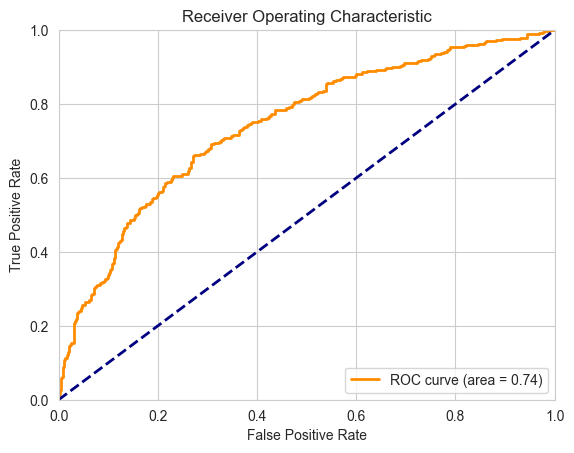

--- prediction done in 3.2230236530303955 seconds ---
>>> Params:  {'sample': 0.004, 'train_size': 0.7, 'test_size': 0.7, 'lstm_units': 32, 'lstm_activation': 'tanh', 'lstm_recurrent_activation': 'sigmoid', 'lstm_kernel_regularizer': <keras.regularizers.L2 object at 0x159247100>, 'lstm_bias_regularizer': <keras.regularizers.L2 object at 0x159247130>, 'lstm_dropout': 0.0, 'lstm_kernel_constraint': None, 'dense_units': 16, 'dense_activation': 'tanh', 'emb_output_dim': 16, 'epochs': 3}
SAMPLE_SIZE:  5224
--- preprocessing done in 0.9408581256866455 s ---
Epoch 1/3
229/229 [==============================] - 33s 128ms/step - loss: 0.6999 - accuracy: 0.5107
Epoch 2/3
229/229 [==============================] - 28s 122ms/step - loss: 0.6947 - accuracy: 0.5165
Epoch 3/3
229/229 [==============================] - 28s 123ms/step - loss: 0.6398 - accuracy: 0.6419
--- model training done in 88.86634111404419 s ---
69/69 [==============================] - 7s 80ms/step - loss: 0.6249 - accuracy: 0.66

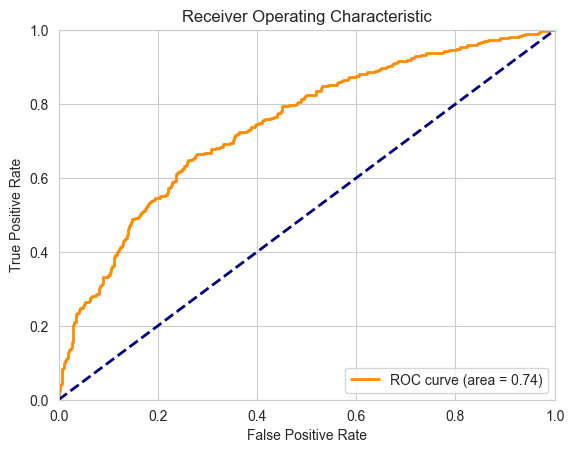

--- prediction done in 3.274844169616699 seconds ---


In [2]:

params = [
    # 0.72
    # {   'sample': 0.003
    #     , 'train_size': 0.7
    #     , 'test_size': 0.7
    #     , 'lstm_units': 64
    #     , 'dense_units': 16
    #     , 'emb_output_dim': 16
    #     , 'return_sequences': False
    #     , 'epochs': 3},
    # za wolno
    # {   'sample': 0.004
    #     , 'train_size': 0.7
    #     , 'test_size': 0.7
    #     , 'lstm_units': 32
    #     , 'lstm_activation': 'sigmoid'
    #     , 'dense_units': 16
    #     , 'emb_output_dim': 16
    #     , 'epochs': 3},
    # czas predykcji o 2 sek krótszy
    # 0.77
    # {   'sample': 0.004
    #     , 'train_size': 0.7
    #     , 'test_size': 0.7
    #     , 'lstm_units': 32
    #     , 'lstm_activation': 'tanh'
    #     , 'lstm_recurrent_activation': 'sigmoid'
    #     , 'lstm_kernel_regularizer': tf.keras.regularizers.l2(0.0001)
    #     , 'dense_units': 16
    #     , 'dense_activation': 'tanh'
    #     , 'emb_output_dim': 16
    #     , 'epochs': 3},
    {   'sample': 0.004
        , 'train_size': 0.7
        , 'test_size': 0.7
        , 'lstm_units': 32
        , 'lstm_activation': 'tanh'
        , 'lstm_recurrent_activation': 'sigmoid'
        , 'lstm_kernel_regularizer': tf.keras.regularizers.l2(0.0001)
        , 'lstm_bias_regularizer': tf.keras.regularizers.l2(0.0001)
        , 'lstm_dropout': 0.0
        , 'lstm_kernel_constraint': None
        # , 'lstm_kernel_constraint': tf.keras.constraints.max_norm(max_value=1)
        , 'dense_units': 16
        , 'dense_activation': 'tanh'
        , 'emb_output_dim': 16
        , 'epochs': 3},
    {   'sample': 0.004
        , 'train_size': 0.7
        , 'test_size': 0.7
        , 'lstm_units': 32
        , 'lstm_activation': 'tanh'
        , 'lstm_recurrent_activation': 'sigmoid'
        , 'lstm_kernel_regularizer': tf.keras.regularizers.l2(0.0001)
        , 'lstm_bias_regularizer': tf.keras.regularizers.l2(0.0001)
        , 'lstm_dropout': 0.0
        , 'lstm_kernel_constraint': None
        , 'dense_units': 16
        , 'dense_activation': 'tanh'
        , 'emb_output_dim': 16
        , 'epochs': 3},
    # 0.76
    # {   'sample': 0.004
    #     , 'train_size': 0.7
    #     , 'test_size': 0.7
    #     , 'lstm_units': 32
    #     , 'lstm_activation': 'tanh'
    #     , 'dense_units': 16
    #     , 'dense_activation': 'relu'
    #     , 'emb_output_dim': 16
    #     , 'epochs': 3},
    # # 0.74
    # {   'sample': 0.003
    #     , 'train_size': 0.7
    #     , 'test_size': 0.7
    #     , 'lstm_units': 32
    #     , 'lstm_activation': 'tanh'
    #     , 'dense_units': 16
    #     , 'emb_output_dim': 16
    #     , 'epochs': 3},
]

raw_df = pd.read_csv('./input/train.csv')
results = []

for p in params:
    print('>>> Params: ', p)
    SAMPLE_SIZE = int(len(raw_df) * p['sample'])
    raw_sicnere = raw_df[raw_df['target'] == 0]
    raw_insicnere = raw_df[raw_df['target'] == 1]
    sample_df = stratify(raw_sicnere, raw_insicnere, SAMPLE_SIZE)

    sentences = sample_df.question_text
    labels = np.array(sample_df.target)
    rnn = RNNModelManager(sentences, labels)
    rnn.preprocess_split(p['train_size'], p['test_size'])

    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=rnn.vocab_size, output_dim=p['emb_output_dim']),
        tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(units=p['lstm_units'], activation=p['lstm_activation']
                                 , recurrent_activation=p['lstm_recurrent_activation']
                                 , kernel_regularizer=p['lstm_kernel_regularizer'], bias_regularizer=p['lstm_bias_regularizer']
                                 , dropout=p['lstm_dropout'], kernel_constraint=p['lstm_kernel_constraint'])),
        tf.keras.layers.Dense(p['dense_units'], activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.
    # rnn.compile_fit_model(model, epochs=p['epochs'])
    # rnn.evaluate()
    # rnn.predict_report()
    # model.reset_states()
    # del model, rnn

>>> Params:  {'sample': 0.04, 'train_size': 0.7, 'test_size': 0.7, 'lstm_units': 32, 'lstm_activation': 'tanh', 'lstm_recurrent_activation': 'sigmoid', 'lstm_kernel_regularizer': <keras.regularizers.L2 object at 0x3279220b0>, 'lstm_bias_regularizer': <keras.regularizers.L2 object at 0x327922ec0>, 'lstm_dropout': 0.0, 'lstm_kernel_constraint': None, 'dense_units': 16, 'dense_activation': 'tanh', 'emb_output_dim': 16, 'epochs': 3}
SAMPLE_SIZE:  52244
--- preprocessing done in 10.64725399017334 s ---
Epoch 1/3
2286/2286 [==============================] - 1214s 523ms/step - loss: 0.6193 - accuracy: 0.6629
Epoch 2/3
2286/2286 [==============================] - 1172s 513ms/step - loss: 0.5828 - accuracy: 0.6986
Epoch 3/3
2286/2286 [==============================] - 1078s 471ms/step - loss: 0.5755 - accuracy: 0.7050
--- model training done in 3463.4245738983154 s ---
686/686 [==============================] - 218s 309ms/step - loss: 0.5766 - accuracy: 0.7071
--- evaluation done in 218.2874019

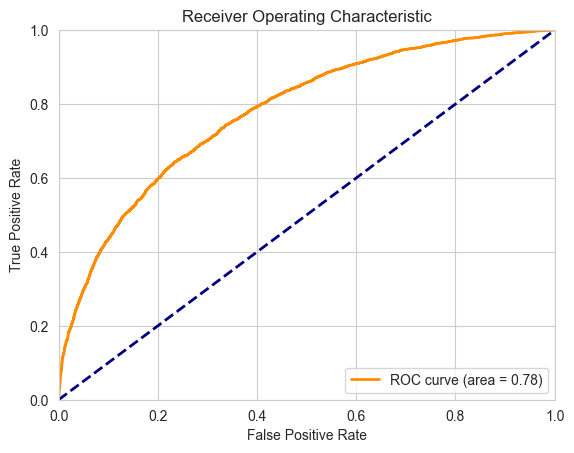

--- prediction done in 84.90369915962219 seconds ---
>>> Params:  {'sample': 0.4, 'train_size': 0.7, 'test_size': 0.7, 'lstm_units': 32, 'lstm_activation': 'tanh', 'lstm_recurrent_activation': 'sigmoid', 'lstm_kernel_regularizer': <keras.regularizers.L2 object at 0x327923ca0>, 'lstm_bias_regularizer': <keras.regularizers.L2 object at 0x327923760>, 'lstm_dropout': 0.0, 'lstm_kernel_constraint': None, 'dense_units': 16, 'dense_activation': 'tanh', 'emb_output_dim': 16, 'epochs': 3}
SAMPLE_SIZE:  80810
--- preprocessing done in 16.370646953582764 s ---
Epoch 1/3
3536/3536 [==============================] - 1771s 496ms/step - loss: 0.6088 - accuracy: 0.6739
Epoch 2/3
3536/3536 [==============================] - 1701s 481ms/step - loss: 0.5770 - accuracy: 0.7041
Epoch 3/3
3536/3536 [==============================] - 1751s 495ms/step - loss: 0.5626 - accuracy: 0.7152
--- model training done in 5222.814366102219 s ---
1061/1061 [==============================] - 337s 313ms/step - loss: 0.5621

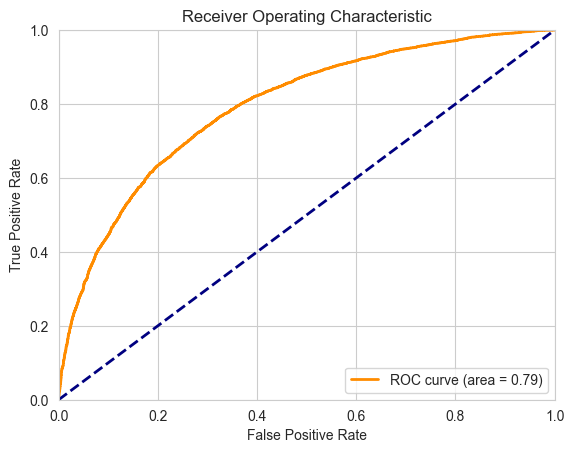

--- prediction done in 125.50876474380493 seconds ---


In [28]:
params = [
    # 0.72
    # {   'sample': 0.003
    #     , 'train_size': 0.7
    #     , 'test_size': 0.7
    #     , 'lstm_units': 64
    #     , 'dense_units': 16
    #     , 'emb_output_dim': 16
    #     , 'return_sequences': False
    #     , 'epochs': 3},
    # za wolno
    # {   'sample': 0.004
    #     , 'train_size': 0.7
    #     , 'test_size': 0.7
    #     , 'lstm_units': 32
    #     , 'lstm_activation': 'sigmoid'
    #     , 'dense_units': 16
    #     , 'emb_output_dim': 16
    #     , 'epochs': 3},
    # czas predykcji o 2 sek krótszy
    # 0.77
    # {   'sample': 0.004
    #     , 'train_size': 0.7
    #     , 'test_size': 0.7
    #     , 'lstm_units': 32
    #     , 'lstm_activation': 'tanh'
    #     , 'lstm_recurrent_activation': 'sigmoid'
    #     , 'lstm_kernel_regularizer': tf.keras.regularizers.l2(0.0001)
    #     , 'dense_units': 16
    #     , 'dense_activation': 'tanh'
    #     , 'emb_output_dim': 16
    #     , 'epochs': 3},
    {   'sample': 0.04
        , 'train_size': 0.7
        , 'test_size': 0.7
        , 'lstm_units': 32
        , 'lstm_activation': 'tanh'
        , 'lstm_recurrent_activation': 'sigmoid'
        , 'lstm_kernel_regularizer': tf.keras.regularizers.l2(0.0001)
        , 'lstm_bias_regularizer': tf.keras.regularizers.l2(0.0001)
        , 'lstm_dropout': 0.0
        , 'lstm_kernel_constraint': None
        # , 'lstm_kernel_constraint': tf.keras.constraints.max_norm(max_value=1)
        , 'dense_units': 16
        , 'dense_activation': 'tanh'
        , 'emb_output_dim': 16
        , 'epochs': 3},
    {   'sample': 0.4
        , 'train_size': 0.7
        , 'test_size': 0.7
        , 'lstm_units': 32
        , 'lstm_activation': 'tanh'
        , 'lstm_recurrent_activation': 'sigmoid'
        , 'lstm_kernel_regularizer': tf.keras.regularizers.l2(0.0001)
        , 'lstm_bias_regularizer': tf.keras.regularizers.l2(0.0001)
        , 'lstm_dropout': 0.0
        , 'lstm_kernel_constraint': None
        , 'dense_units': 16
        , 'dense_activation': 'tanh'
        , 'emb_output_dim': 16
        , 'epochs': 3},
    # 0.76
    # {   'sample': 0.004
    #     , 'train_size': 0.7
    #     , 'test_size': 0.7
    #     , 'lstm_units': 32
    #     , 'lstm_activation': 'tanh'
    #     , 'dense_units': 16
    #     , 'dense_activation': 'relu'
    #     , 'emb_output_dim': 16
    #     , 'epochs': 3},
    # # 0.74
    # {   'sample': 0.003
    #     , 'train_size': 0.7
    #     , 'test_size': 0.7
    #     , 'lstm_units': 32
    #     , 'lstm_activation': 'tanh'
    #     , 'dense_units': 16
    #     , 'emb_output_dim': 16
    #     , 'epochs': 3},
]

raw_df = pd.read_csv('./input/train.csv')
results = []

for p in params:
    print('>>> Params: ', p)
    SAMPLE_SIZE = int(len(raw_df) * p['sample'])
    raw_sicnere = raw_df[raw_df['target'] == 0]
    raw_insicnere = raw_df[raw_df['target'] == 1]
    sample_df = stratify(raw_sicnere, raw_insicnere, SAMPLE_SIZE)

    sentences = sample_df.question_text
    labels = np.array(sample_df.target)
    rnn = RNNModelManager(sentences, labels)
    rnn.preprocess_split(p['train_size'], p['test_size'])

    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=rnn.vocab_size, output_dim=p['emb_output_dim']),
        tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(units=p['lstm_units'], activation=p['lstm_activation']
                                 , recurrent_activation=p['lstm_recurrent_activation']
                                 , kernel_regularizer=p['lstm_kernel_regularizer'], bias_regularizer=p['lstm_bias_regularizer']
                                 , dropout=p['lstm_dropout'], kernel_constraint=p['lstm_kernel_constraint'])),
        tf.keras.layers.Dense(p['dense_units'], activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    rnn.compile_fit_model(model, epochs=p['epochs'])
    rnn.evaluate()
    rnn.predict_report()
    model.reset_states()
    del model, rnn